# Example 

## TERS image of a selected vibrational mode of the benzene (C$_6$H$_6$) molecule 

### Step 1.  Normal Modes Calculation of C$_6$H$_6$
The normal modes of benzene are computed through a python script called ```get_vibrations.py``` found in FHI-aims utilities directory and copied in this repository for completeness. Please check the tutorial in the FHI-aims manual for more details about this script.



**Use `-s srun` when running on HPC clusters with SLURM**

**Use `-s mpirun` for local mpi implementations or nothing if you want to run in serial**

The output of the script, where the normal modes in Cartesian coordinates are printed, is called car_eig_vec.C6H6.dat and basically that is the only output of get_vibrations.py you need for the local raman calculation. Another output of get_vibrations.py called C6H6.xyz allows you to visualize the modes in `Jmol` for example.

The car_eig_vec.C6H6.dat contains 3N lines where N is the number of atoms, that represents the displacement of each atom (x y z) in 3N modes. In other words, each line is the a mode displacement of  x1 y1 z1 x2 y2 z2 ... xN yN zN.

C6H6.xyz contains $<elementSymbol> <x> <y> <z> <x-vector> <y-vector> <z-vector> $, the vector represents the catesian normal mode.


### Step 2: Visualize the normal modes with e.g. `Jmol`

To visualize the vibrations in jmol use:

Choose `Tools -> AtomSetChooser` to navigate the normal mode vibrations.

We will choose mode number 11 for this exercise (a2u symmetry) which can be visualized below:

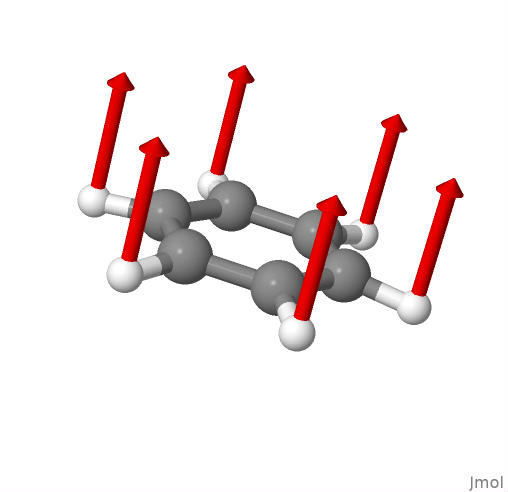

In [9]:
from IPython import display
import os
cwd = os.getcwd()
display.Image(cwd+"/example/output/C6H6_11.jpg", width=200)

### Step 3: Running local raman calculations
To run this calculation, you will need the inputs provided in the `example/inputs` folder. These include a `.cube` file that was generated from TDDFT calculations for a certain tip geometry and excitation energy (please refer to our publication for more details). In addition, due to technical details of the implementation, you will also need to provide use an empty cube file (`zeros.cube`). For more details about running density-functional perturbation theory with a local space-varying electric field, please check the FHI-aims manual.

You will also need a template `control.in` file and a `geometry.in` file consistent with the fully optimized geometry that was used to obtain the normal modes. The normal modes can be read from car_eig_vec.name.dat and in this example is car_eig_vec.C6H6.dat .

The script `local.py` will set up the calculations and includes informative descriptions of each flag. A short description of the flags is given below:

##### Explanation of options:
-- name : it is the name of the molecule and it should be the same name in get_vibrations.py

-t --tip: the tip apex position that is given in the position.dat file in A (-0.000030 -1.696604 -4.6140)

-z --height: is the distance from tip apex to the molecule

-m --mode: is the mode to be visualized

-f --displacement: is the cartesian displacement in AA of the geometry moved along normal mode

-d --step: the step size of the grid, starting at tip Apex position, used to define the position of the tip with respect to the center of mass of the molecule

-n --size: is the size of the grid (number of steps)

-p --plot: To plot the TERS image 

⚠️ **Packages**: You may need to install these packages to run the script 

`sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng
pip install latex`

An example of the command line to run the code is

#### Flow of the scipt:
I. Pre-processing:
 1. Creating a grid around the tip apex position.
 3. Creating folders with the extention of the grid position.  
 4. Moving center of mass of molecule on the grid. 
 5. Moving the geometry along the chosen normal mode in the positive and negative directions.
 6. Copying `control.in` with DFPT commands and the cube files to the folders generated.

II. Processing:
 1. Running FHI-aims in each folder.

III. Post-processing:
 1. Reads in the $zz$ component of the polarizability tensor $\alpha_{zz}$ from the FHI-aims output files.
 2. Calculates Raman intensity numerically from $$I^{\text{Raman}}(\omega_i) \propto \bigg|\frac{\partial \alpha_{zz}}{\partial Q_i}\bigg|^2,$$ where $Q_i$ is the $i$-th vibrational normal mode

The image produced here for this normal mode, which is also shown in our publication, is exemplified below. 

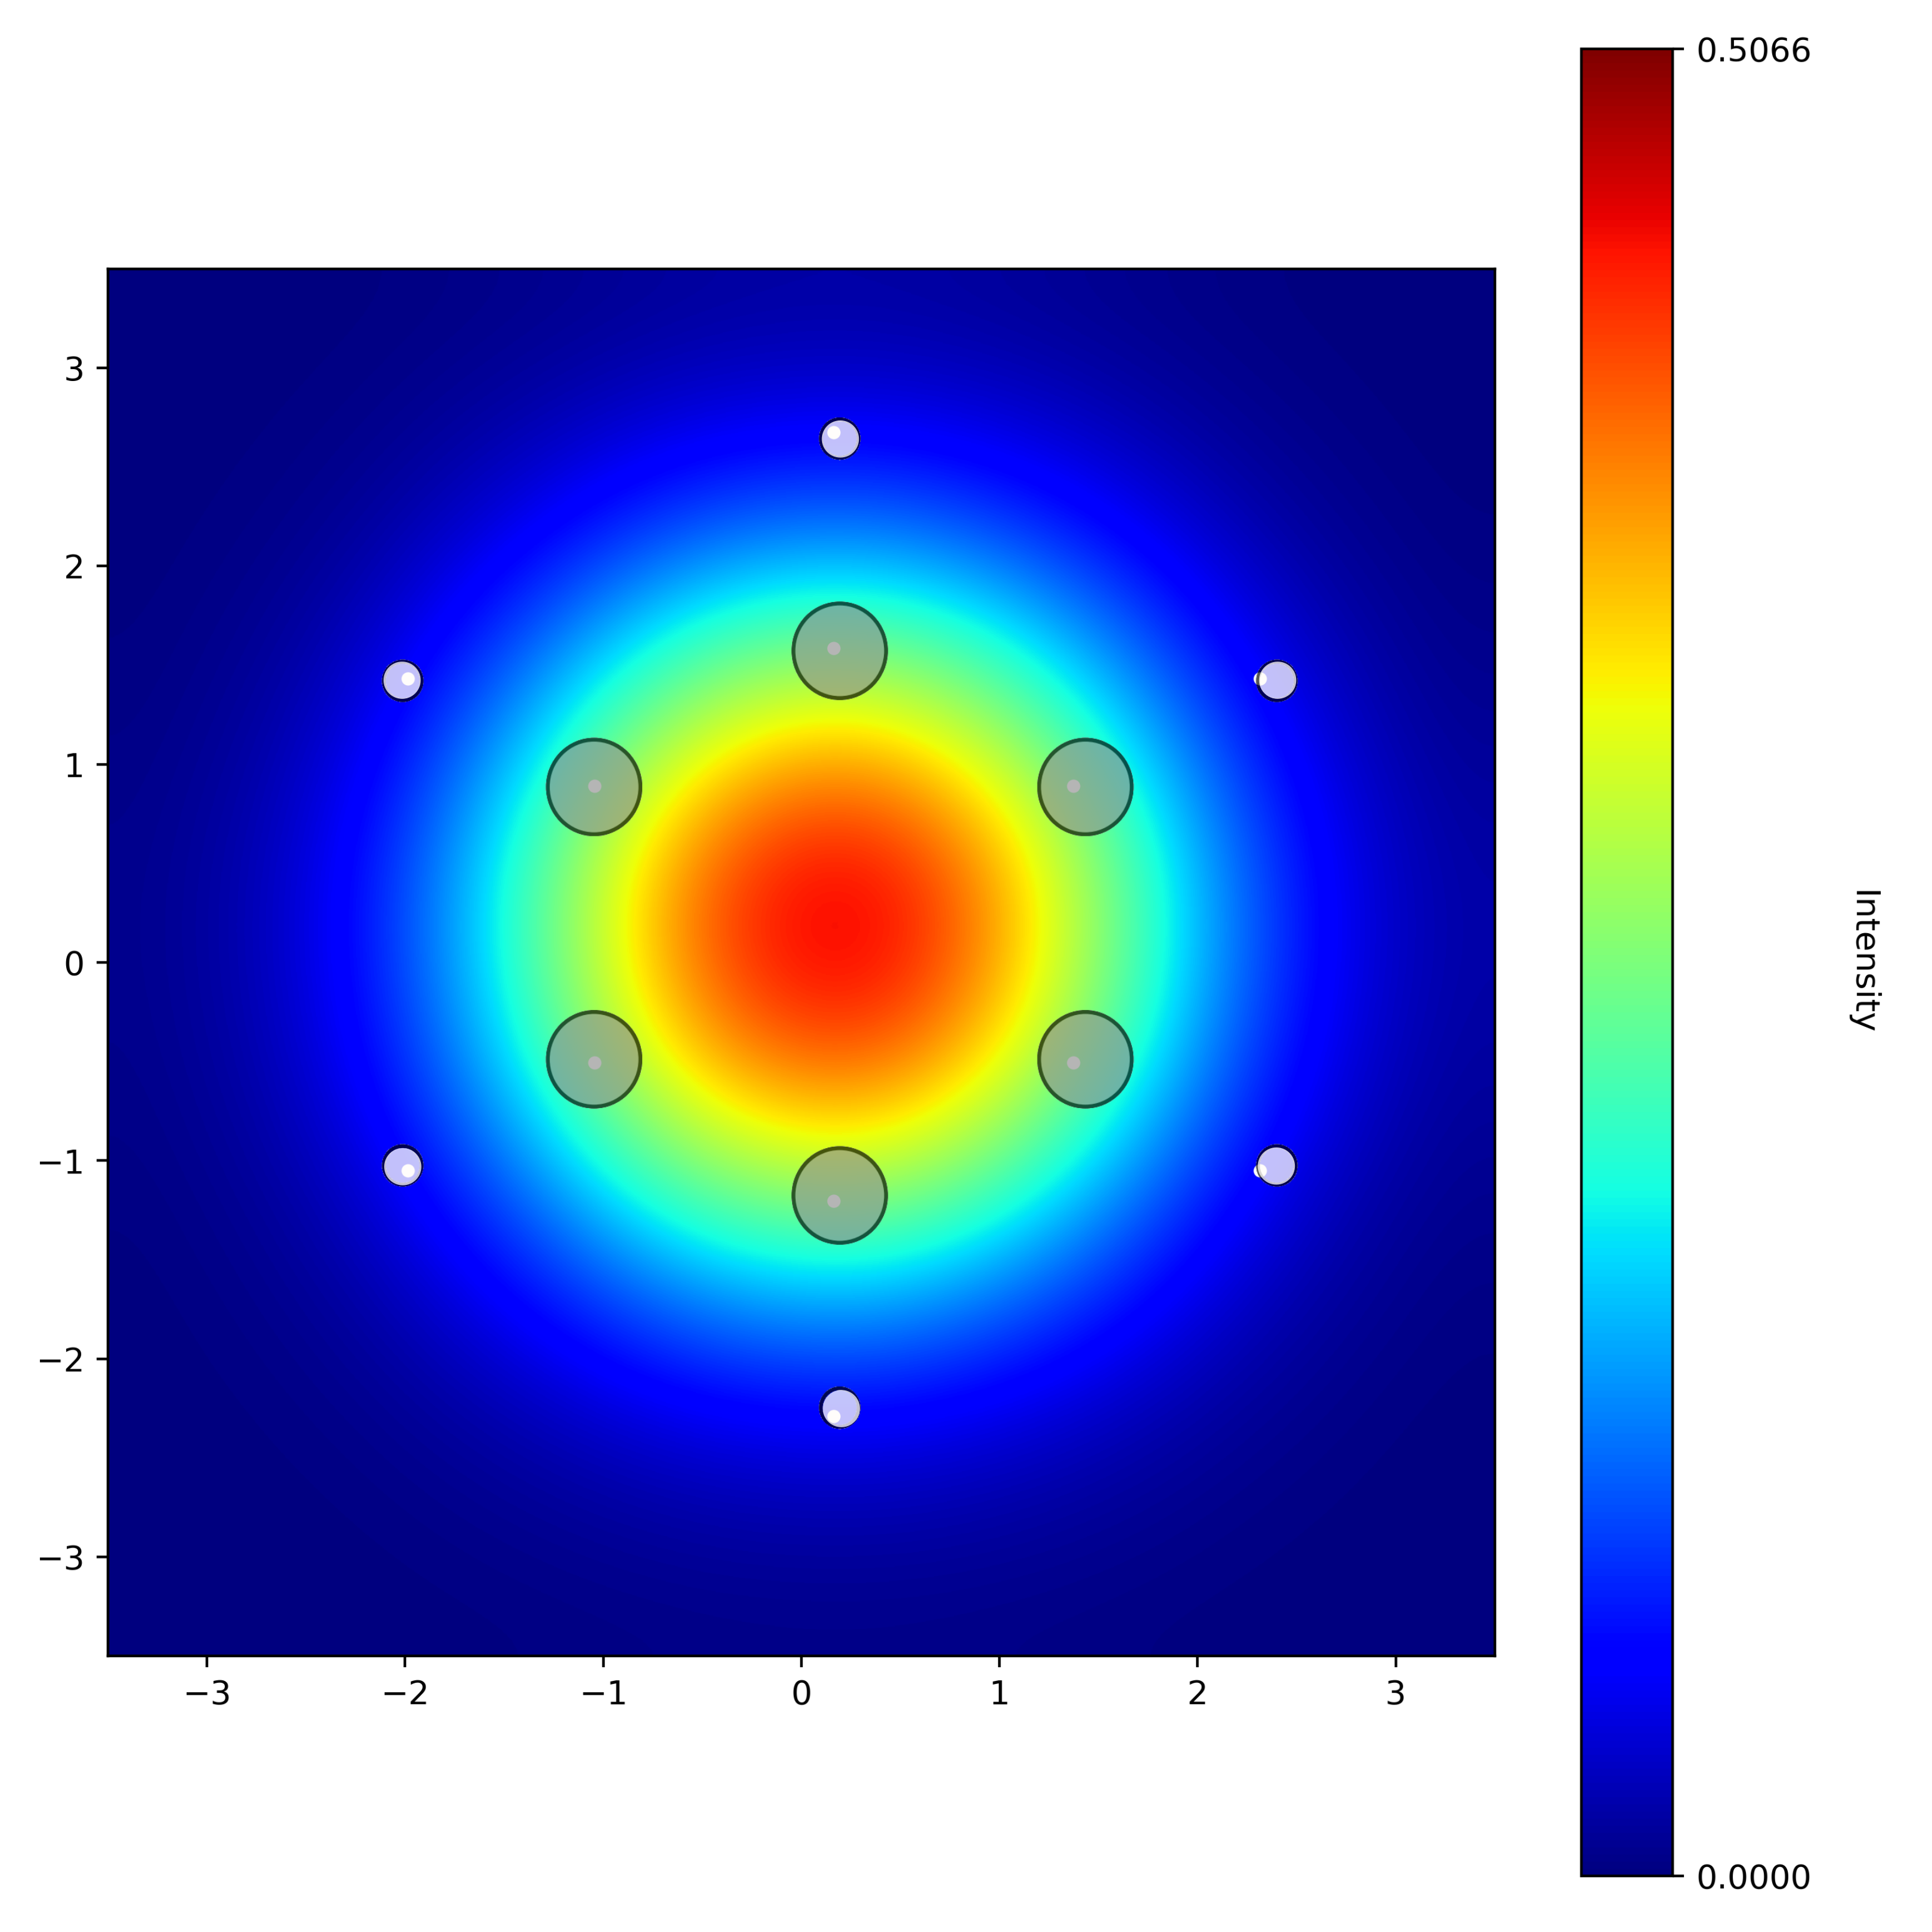

In [10]:
from IPython import display
import os
cwd = os.getcwd()
display.Image(cwd+"/example/output/C6H6.png", width=300)